In [2]:
#Multinomial  NB
from sklearn.datasets import make_multilabel_classification
import pandas as pd
import numpy as np


# Generating multi-nomial data
X, y = make_multilabel_classification(n_samples=200, n_features=10,
                                      n_classes=2, n_labels=1, 
                                      allow_unlabeled=False, 
                                      random_state=42)

# Getting rid of second column
y = y[:, 0]

# Wraping them in a dataframe
df = pd.DataFrame(X, columns=[f'feature{i}' for i in range(X.shape[1])])
df["y"] = y

print(df.head)

<bound method NDFrame.head of      feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
0        13.0       2.0       0.0       9.0       0.0       7.0       0.0   
1         8.0       2.0       5.0       6.0       6.0       4.0       1.0   
2         7.0       2.0      14.0       4.0      14.0       1.0       1.0   
3         8.0       2.0      11.0       6.0      16.0       3.0       0.0   
4        12.0       1.0       6.0       6.0       7.0       6.0       3.0   
..        ...       ...       ...       ...       ...       ...       ...   
195      11.0       0.0       0.0       9.0       1.0       6.0       0.0   
196       6.0       2.0       3.0       8.0       6.0       5.0       3.0   
197       9.0       4.0       1.0       5.0       0.0      14.0       3.0   
198       7.0       2.0       7.0       6.0      11.0       1.0       3.0   
199       8.0       1.0       7.0       8.0       3.0       9.0       1.0   

     feature7  feature8  feature9  y  
0     

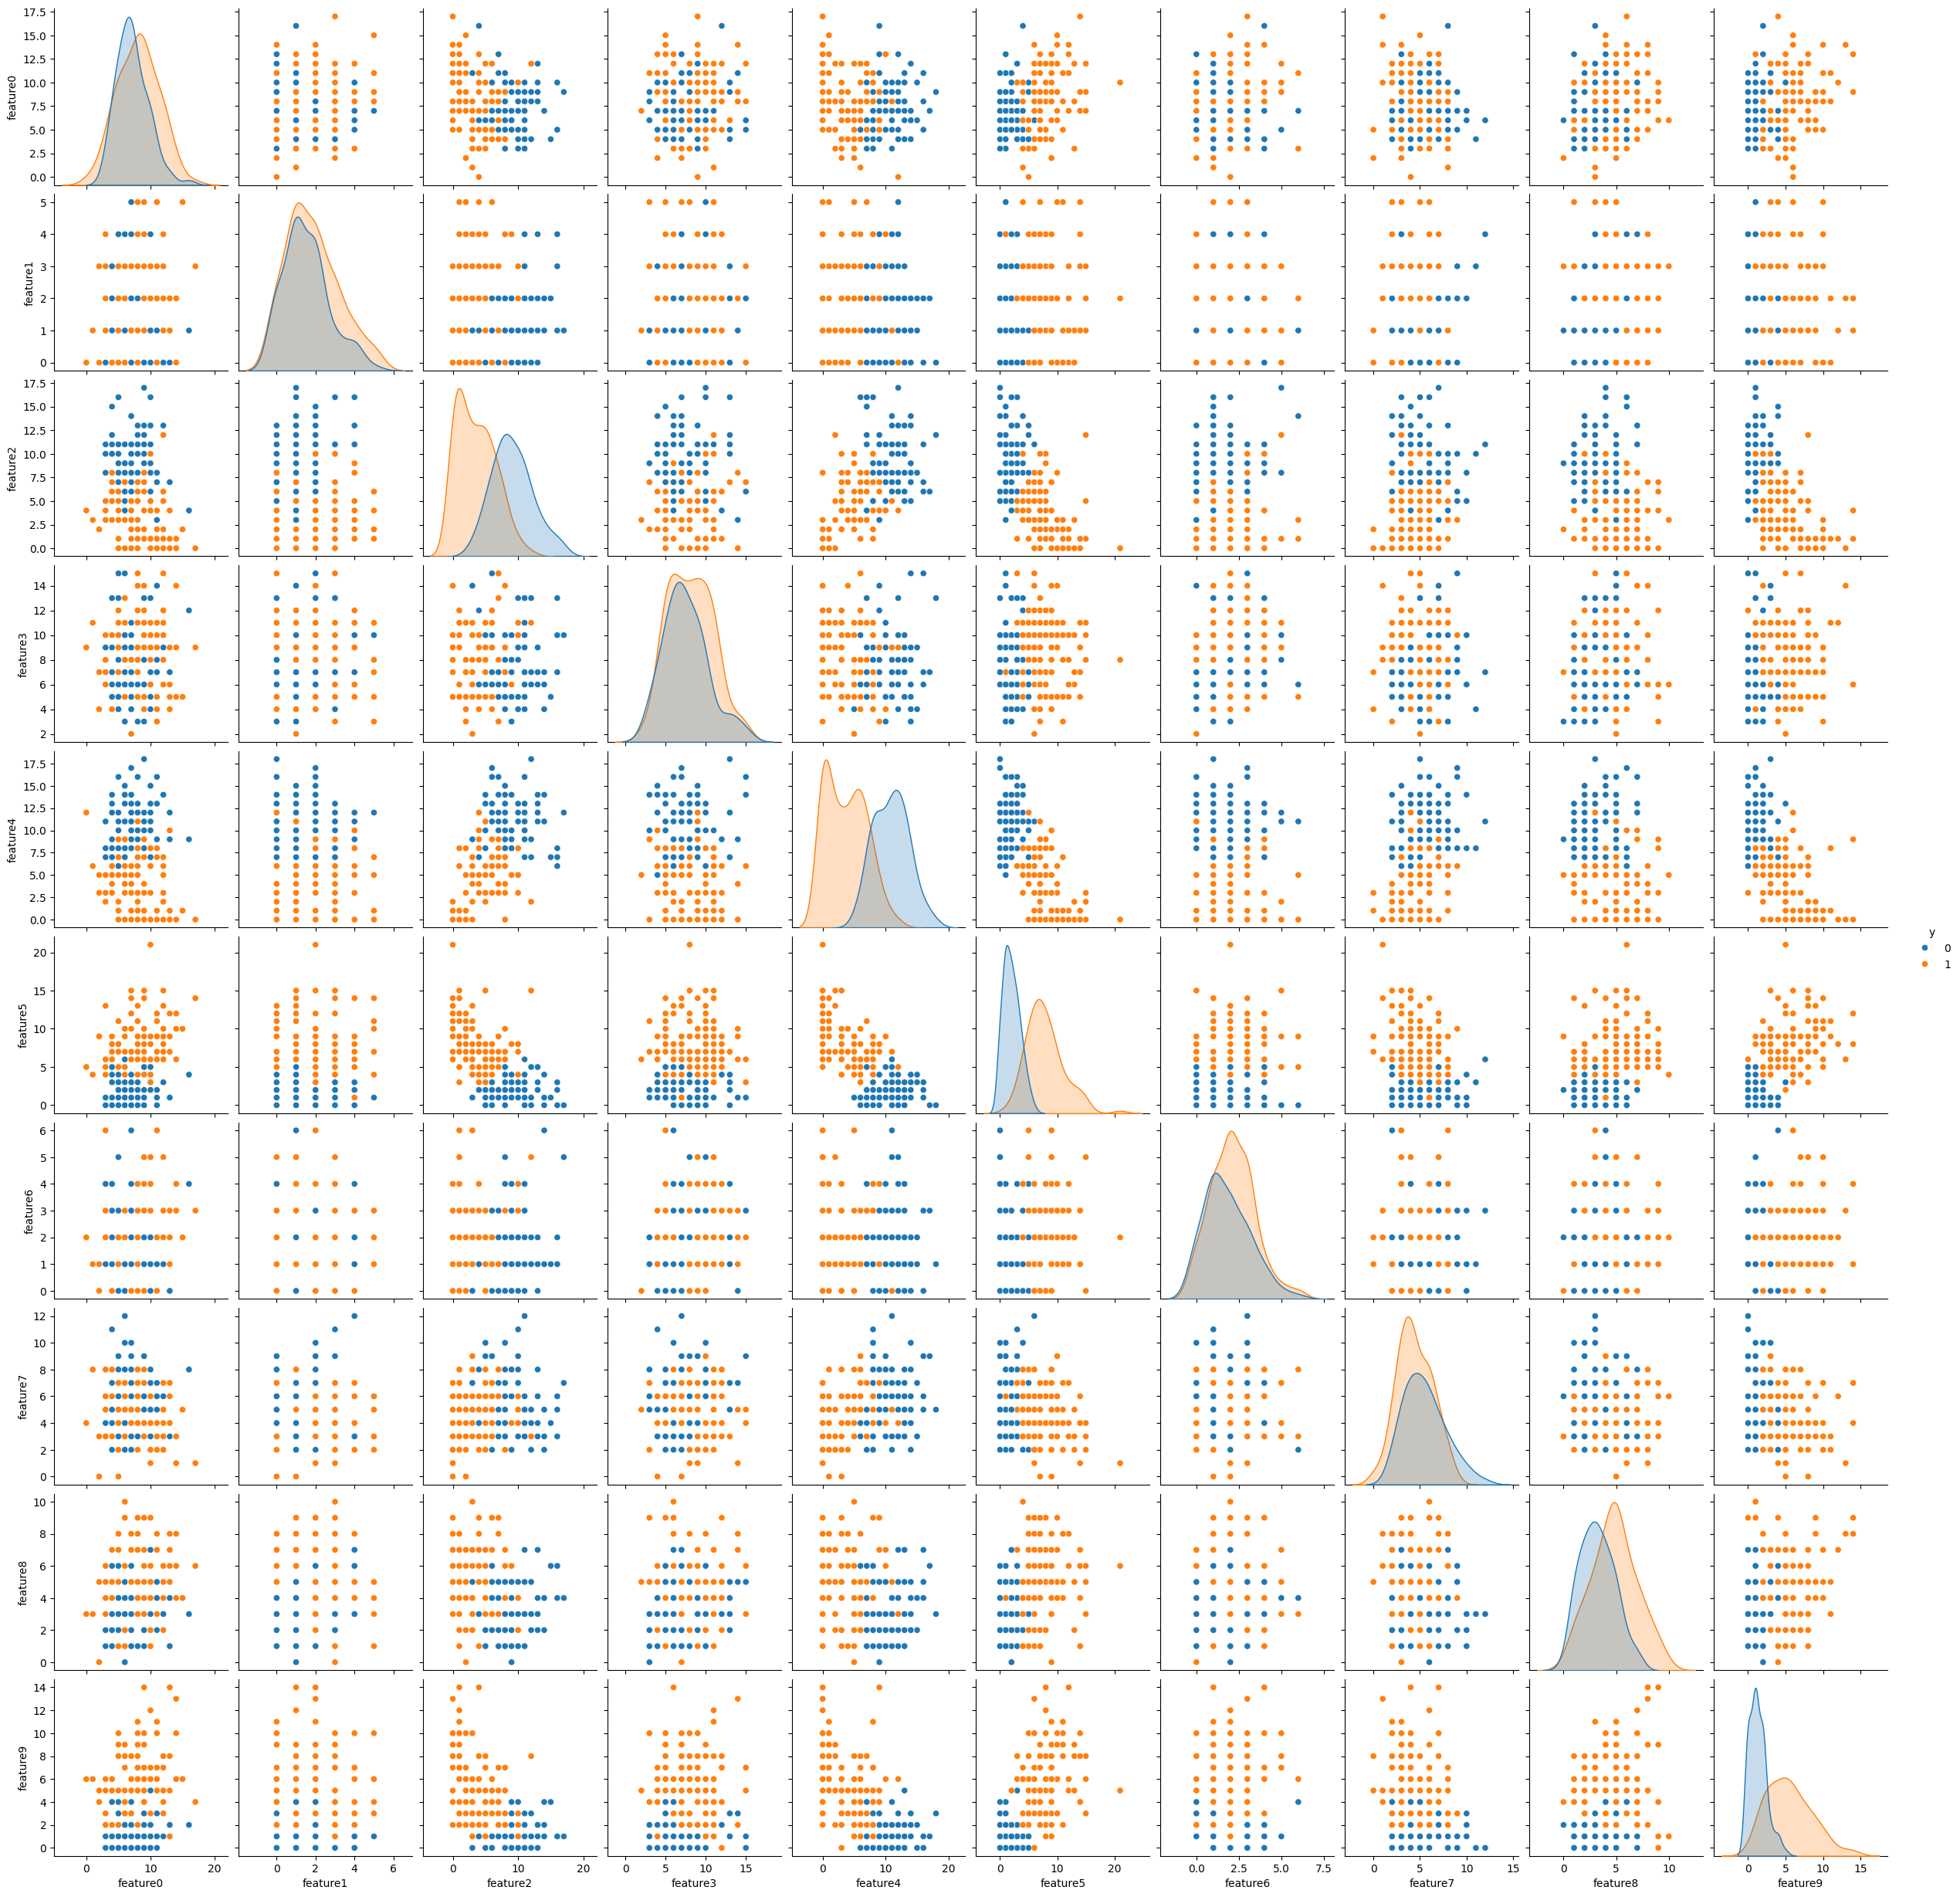

In [3]:
# Visualization
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns


sns.pairplot(df, hue="y", palette="tab10")
plt.show()


In [4]:
class MultinomialNB():
    def __init__(self, alpha=0.1):
        self.alpha = alpha # Laplace smoothing parameter: Helps avoid zero probability
        self.class_log_prior_ = None
        self.feature_log_prob_ = None
        self.classes_ = None

    def fit(self, X, y):
        X = np.array(X) # Features
        y = np.array(y) # Labels
        n_samples, n_features = X.shape 
        self.classes_ = np.unique(y) # Distint classes: List of all the unique classes
        n_classes = len(self.classes_) # Total no. of classes 

        # Inilialize counts
        class_count = np.zeros(n_classes) # To count how many samples belong to each class.
        features_count = np.zeros((n_classes, n_features)) # total occurance of each feature for each class

        for idx, c in enumerate(self.classes_):
            X_c = X[y==c] # Filtering rows which belong to class c.
            class_count[idx] = X_c.shape[0]
            features_count[idx, :] = X_c.sum(axis=0)

        # Prior Probability log(P(y)) # Probabilities of classes
        self.class_log_prior_ = np.log(class_count / class_count.sum())
        
        # Liklihood log(P(x_i/y)): probability that x_i belong to class y
        smoothed_fc = features_count + self.alpha
        smoothed_fc_sum = smoothed_fc.sum(axis=1).reshape(-1,1) # =y: sum of all the feature freq. that belong to class y.
        self.feature_log_prob_ = np.log(smoothed_fc / smoothed_fc_sum)


    def predict_log_proba(self, X): # Log Probabilites
        X = np.array(X)
        return X @ self.feature_log_prob_.T  + self.class_log_prior_ # We are adding because we took log: changed * --> +
    
    def predict_proba(self, X): # Actual probabilities
        log_probs = self.predict_log_proba(X)
        probs = np.exp(log_probs)
        return probs / probs.sum(axis=1, keepdims=True) # Ensuring probabilies follow the this: sum of all the probailities = 1
    
    def predict(self, X):
        log_probs = self.predict_log_proba(X)
        return self.classes_[np.argmax(log_probs, axis=1)]
    
    def score(self, X, y):
        return np.mean(self.predict(X) == y)





In [5]:
# Evaluation of our model
from sklearn.metrics import classification_report

nb = MultinomialNB()
nb.fit(X, y)
y_pred = nb.predict(X)
print("Our model score: ",nb.score(X, y))
print(classification_report(y, y_pred))

Our model score:  0.96
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        87
           1       1.00      0.93      0.96       113

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [6]:
# Comparison with sklean
import sklearn.naive_bayes

sk_nb = sklearn.naive_bayes.MultinomialNB()
sk_nb.fit(X, y)
y_pred_sk = sk_nb.predict(X)

sk_accur = np.mean(y_pred_sk == y)
print("sklearn's NB: ", sk_accur)
print(classification_report(y, y_pred_sk))

sklearn's NB:  0.96
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        87
           1       1.00      0.93      0.96       113

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

